In [131]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


data=pd.read_csv('D:\\download Chrome\\result with entropies_com.csv')
#data=pd.read_csv('D:\\download Chrome\\result with entropies.csv')


In [132]:
mean_pd=pd.DataFrame(data.groupby('overlap_count')['entropies'].mean())
mean_pd['overlap_count']=mean_pd.index

Correlation coefficient: 0.9021223750766215


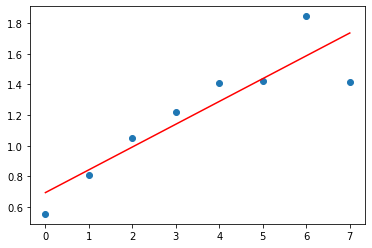

In [133]:
import seaborn as sns

x=mean_pd['overlap_count']
y=mean_pd['entropies']

corr = np.corrcoef(x, y)[0, 1]
print("Correlation coefficient:", corr)

# 用一次多项式拟合，也就是线性拟合
z = np.polyfit(x, y, 1)
p = np.poly1d(z)


plt.scatter(x, y)
plt.plot(x, p(x), "r")

plt.show()

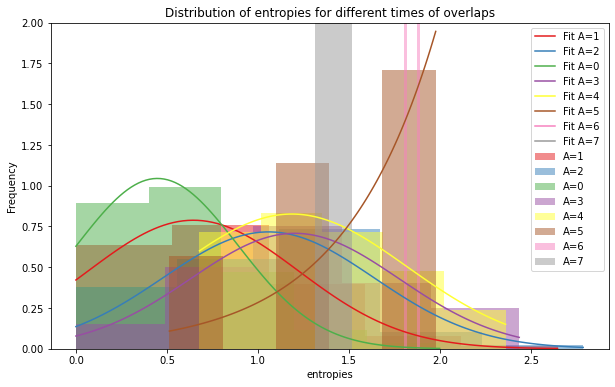

In [126]:
import matplotlib.cm as cm

colors = cm.Set1(np.linspace(0, 1, 8))

# 循环遍历 A 列的所有可能值，并绘制直方图
def gaussian(x, a, mu, sigma):
    return a * np.exp(-(x - mu)**2 / (2 * sigma**2))

fig, ax = plt.subplots(figsize=(10, 6))

i=0
for val in data['overlap_count'].unique():
    
    # 选择 A 列为当前值的行
    df_filtered = data[data['overlap_count'] == val]
    
    n, bins, patches = ax.hist(df_filtered['entropies'],color=colors[i], bins=5, density=True,alpha=0.5, label='A={}'.format(val))

    bin_centers = (bins[1:] + bins[:-1]) / 2
    popt, pcov = curve_fit(gaussian, bin_centers, n,maxfev=500000)
    
   # plt.legend()


    # 绘制直方图，并调整透明度
    x_fit = np.linspace(np.min(df_filtered['entropies']), np.max(df_filtered['entropies']), 100)
    y_fit = gaussian(x_fit, *popt)
    ax.plot(x_fit, y_fit, '-', label='Fit A={}'.format(val),color=colors[i])
    i=i+1
# 添加标签和标题
plt.xlabel('entropies')
plt.ylabel('Frequency')
plt.title('Distribution of entropies for different times of overlaps')

# 添加图例
plt.legend()
plt.ylim(0,2)

# 显示图形
plt.show()